# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [52]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    for i in range(maxiter):
        dx = - f(x0) / fder(x0)
        x0 += dx
        if abs(dx) < eps:
            break
    return x0, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [53]:
def f(x):  
    return x**2 - 1


def fder(x): 
    return 2 * x


print(newton_iteration(f, fder, 2.0))

(1.000000000000001, 4)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [54]:
def newton_iteration_mult(f, fder, x0, m, eps=1e-5, maxiter=1000):
    for i in range(maxiter):
        dx = - m * f(x0) / fder(x0)
        x0 += dx
        if abs(dx) < eps:
            break
    return x0, i

In [55]:
# Now we should test it

def f(x):  
    return (x**2 - 1)**2


def fder(x): 
    return 4 * (x**2 - 1) * x


for k in range(1, 6):
    print(newton_iteration_mult(f, fder, 2.0, k))

(1.0000078296573287, 17)
(1.000000000000001, 4)
(0.9999978588127855, 16)
(2.0, 999)
(2.239676310795981, 999)


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

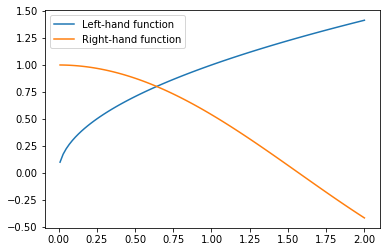

In [80]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0.01, 2.0, 10**2)
f1 = np.sqrt(x)
f2 = np.cos(x)
plt.plot(x, f1, label='Left-hand function' )
plt.plot(x, f2, label='Right-hand function' )
plt.legend()
plt.show()

In [57]:
# Upon inspection of the graph above, we conclude that the root is localized somewhere near 0.6 

In [58]:
def fixed_point_iteration(f, x0, eps=1e-5, maxiter=1000):
    for i in range(maxiter):
        dx = - f(x0)
        x0 = x0 - f(x0)
        if abs(dx) < eps:
            break
    return x0, i

In [59]:
def f(x):  
    return np.sqrt(x) - np.cos(x)

print(fixed_point_iteration(f, 2.0))

(0.641715023943625, 9)


In [38]:
def fixed_point_iteration_mod(f, x0, a, eps=1e-5, maxiter=1000):
    for i in range(maxiter):
        dx = - a * f(x0)
        x0 = x0 - a * f(x0)
        if abs(dx) < eps:
            break
    return x0, i

In [66]:
# Let's find the optimal value of a

In [71]:
def f(x):  
    return np.sqrt(x) - np.cos(x)


def fder(x):
    return 0.5/np.sqrt(x) + np.sin(x)


x = np.linspace(0.6, 0.7, 10**2)
m = np.min(np.abs(fder(x)))
M = np.max(np.abs(fder(x)))
a_ = 2 / (m + M)

print(a_)

0.8156701027290181


In [72]:
# Now let's find the dependence of the number of iterations on a and see if the minimum corresponds to a_

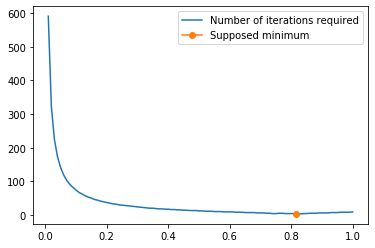

In [76]:
a = np.linspace(0.01, 1.0, 10**2)
iterations = [fixed_point_iteration_mod(f, 2.0, k)[1] for k in a]
plt.plot(a, iterations, label='Number of iterations required' )
plt.plot(a_, fixed_point_iteration_mod(f, 2.0, a_)[1], marker='o', label='Supposed minimum')
plt.legend()
plt.show()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.